LDA Accuracy = 0.97
QDA Accuracy = 0.94
[]


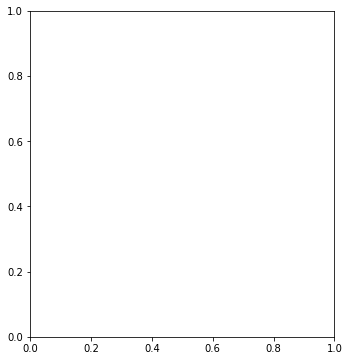

In [69]:
 
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from math import sqrt
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys

def ldaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmat - A single d x d learnt covariance matrix 
    
    d = np.shape(X)[1]
    nc = int(np.max(y))
    
    means = np.empty((d, nc));

    covmat = np.zeros(d)
    for i in range (1, nc + 1):
        a = np.where(y==i)[0]
        trainData = X[a,:]
        means[:, i-1] = np.mean(trainData, axis=0).transpose()
        covmat = covmat + (np.shape(trainData)[0]-1) * np.cov(np.transpose(trainData))


    covmat = (1.0/(np.shape(X)[0] - nc)) * covmat;# - numClass));

    return means,covmat

def qdaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes
    nc = int(np.max(y))
    d = np.shape(X)[1]
    means = np.empty((d, nc));

    covmats = []
    for i in range (1, nc+1):
        c = np.where(y==i)[0]
        train_data = X[c,:]
        means[:, i-1] = np.mean(train_data, axis=0).transpose()
        n=np.transpose(train_data)
        m=np.cov(n)
        covmats.append(m)
       # covmats.append(np.cov(np.transpose(train_data)))

    return means,covmats

def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    
    result_array = np.array([])
    ytest = ytest.astype(int);
    correct_count = 0.0;
    inverse = np.linalg.inv(covmat);
    
    N = np.shape(Xtest)[0];
    
    #d = np.shape(Xtest)[1];
    classCount = np.shape(means)[1];
    for i in range (1, N + 1):
        
        pdf = 0;
        classNum = 0;
        testing_X = np.transpose(Xtest[i-1,:]);
        for j in range (1, classCount+1):
            
            answer = np.exp((-1/2)*np.dot(np.dot(np.transpose(testing_X - means[:, j-1]),inverse),(testing_X - means[:, j-1])));
            
            if (answer > pdf):
                pdf = answer;
                classNum = j;
                
                
        if (classNum == ytest[i-1]):
            correct_count= correct_count +1 
            #print(classNum)
            result_array = np.append(result_array, classNum)
            #print(len(my_list))
            #print(my_list)

        
    acc = correct_count/N;
    #print(result_array)
    return acc, result_array
def qdaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuray value
    my_list=[]
    covmats1 = np.copy(covmats)
    
    class_count = np.shape(means)[1];
    normalizer = np.zeros(class_count);
    
    for i in range (1, class_count+1):
        d = np.shape(covmats1[i-1])[0];
        covmats1[i-1] = np.linalg.inv(covmats1[i-1]);
        a= np.power(2*np.pi, d/2)
        b= np.power(np.linalg.det(covmats1[i-1]),1/2)
        normalizer[i-1] = 1.0/(a*b);
       
       
    N = np.shape(Xtest)[0];
    #d = np.shape(Xtest)[1];
    
    count_correct = 0.0;
    ytest = ytest.astype(int);
    for i in range (1, N + 1):
        pdf = 0;
        classnum = 0;
        test_X = np.transpose(Xtest[i-1,:]);
        for j in range (1, class_count+1):
            inverse = covmats1[j-1];
           
            answer = normalizer[j-1]*np.exp((-1/2)*np.dot(np.dot(np.transpose(test_X - means[:, j-1]),inverse),(test_X - means[:, j-1])));
            if (answer > pdf):
                pdf = answer;
                classnum = j;
                my_list.append(classnum)
                
        if (classnum == ytest[i-1]):
            count_correct = count_correct + 1;
    acc = count_correct/N;
    return acc, my_list


# Main script
# Problem 1
# load the sample data                                                                 
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')

# LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))
# QDA
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))


# plotting boundaries
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
print(zldares)
#print(zldares)
#print(len(x1))
#print(len(x2))
#print(len(zldares))



plt.show()


